# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования** - провести исследовательский анализ данных и определить параметры, влияющие на цену объектов недвижимости

**Ход исследования:**

**Предобработка данных**  
- Дубликаты  
- Пропуски  
- Типизация  

**Проведение дополнительных расчетов для дальнейшего исследовательского анализа**  

**Проведение исследовательского анализа данных**  

- **Изучение распределения основных характеристик данных**  
   - Общая, жилая и кухонная площади  
   - Цена объекта  
   - Количество комнат  
   - Высота потолков  
   - Тип этажа квартиры  
   - Общее количество этажей в доме  
   - Расстояние до центра города  
   - Расстояние до ближайшего парка  
 - Изучение скорости продажи квартиры  

**Изучение факторов, влияющих на стоимость квартир**  
- Статистика цен квадратного метра  
- Статистика изменения цен по километрам  

**Общий вывод**

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.options.display.float_format = '{:_.2f}'.format

## Изучение данных

Загрузим данные из папки `./Data/real_estate_data.csv`

In [116]:
try:
    data = pd.read_csv('./Data/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13_000_000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18_863.00,16_028.00,1.00,482.00,2.00,755.00,NaN
1,7,3_350_000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12_817.00,18_603.00,0.00,NaN,0.00,NaN,81.00
2,10,5_196_000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21_741.00,13_933.00,1.00,90.00,2.00,574.00,558.00
3,0,64_900_000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28_098.00,6_800.00,2.00,84.00,3.00,234.00,424.00
4,2,10_000_000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31_856.00,8_098.00,2.00,112.00,1.00,48.00,121.00


**Описание данных:**

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

Посмотрим на общую **структуру данных**

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

> Есть несколько столбцов с некорректным типом данных. Будем иметь это ввиду, когда займемся предобработкой данных

Посмотрим где есть **пропуски**

In [118]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

> Пропусков много. Во время предобработки данных будем решать что с этим делать

Посчитаем **основные статистики** и построим **гистограммы распределений** числовых данных

In [119]:
display(data.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23_699.00,23_699.00,23_699.00,23_699.00,14_504.00,23_613.00,21_796.00,23_699.00,21_421.00,12_180.00,18_157.00,18_180.00,18_181.00,8_079.00,18_181.00,9_110.00,20_518.00
mean,9.86,6_541_548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28_793.67,14_191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10_887_013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12_630.88,8_608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12_190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3_400_000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18_585.00,9_238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4_650_000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26_726.00,13_098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6_800_000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37_273.00,16_293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763_000_000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84_869.00,65_968.00,3.00,3_190.00,3.00,1_344.00,1_580.00


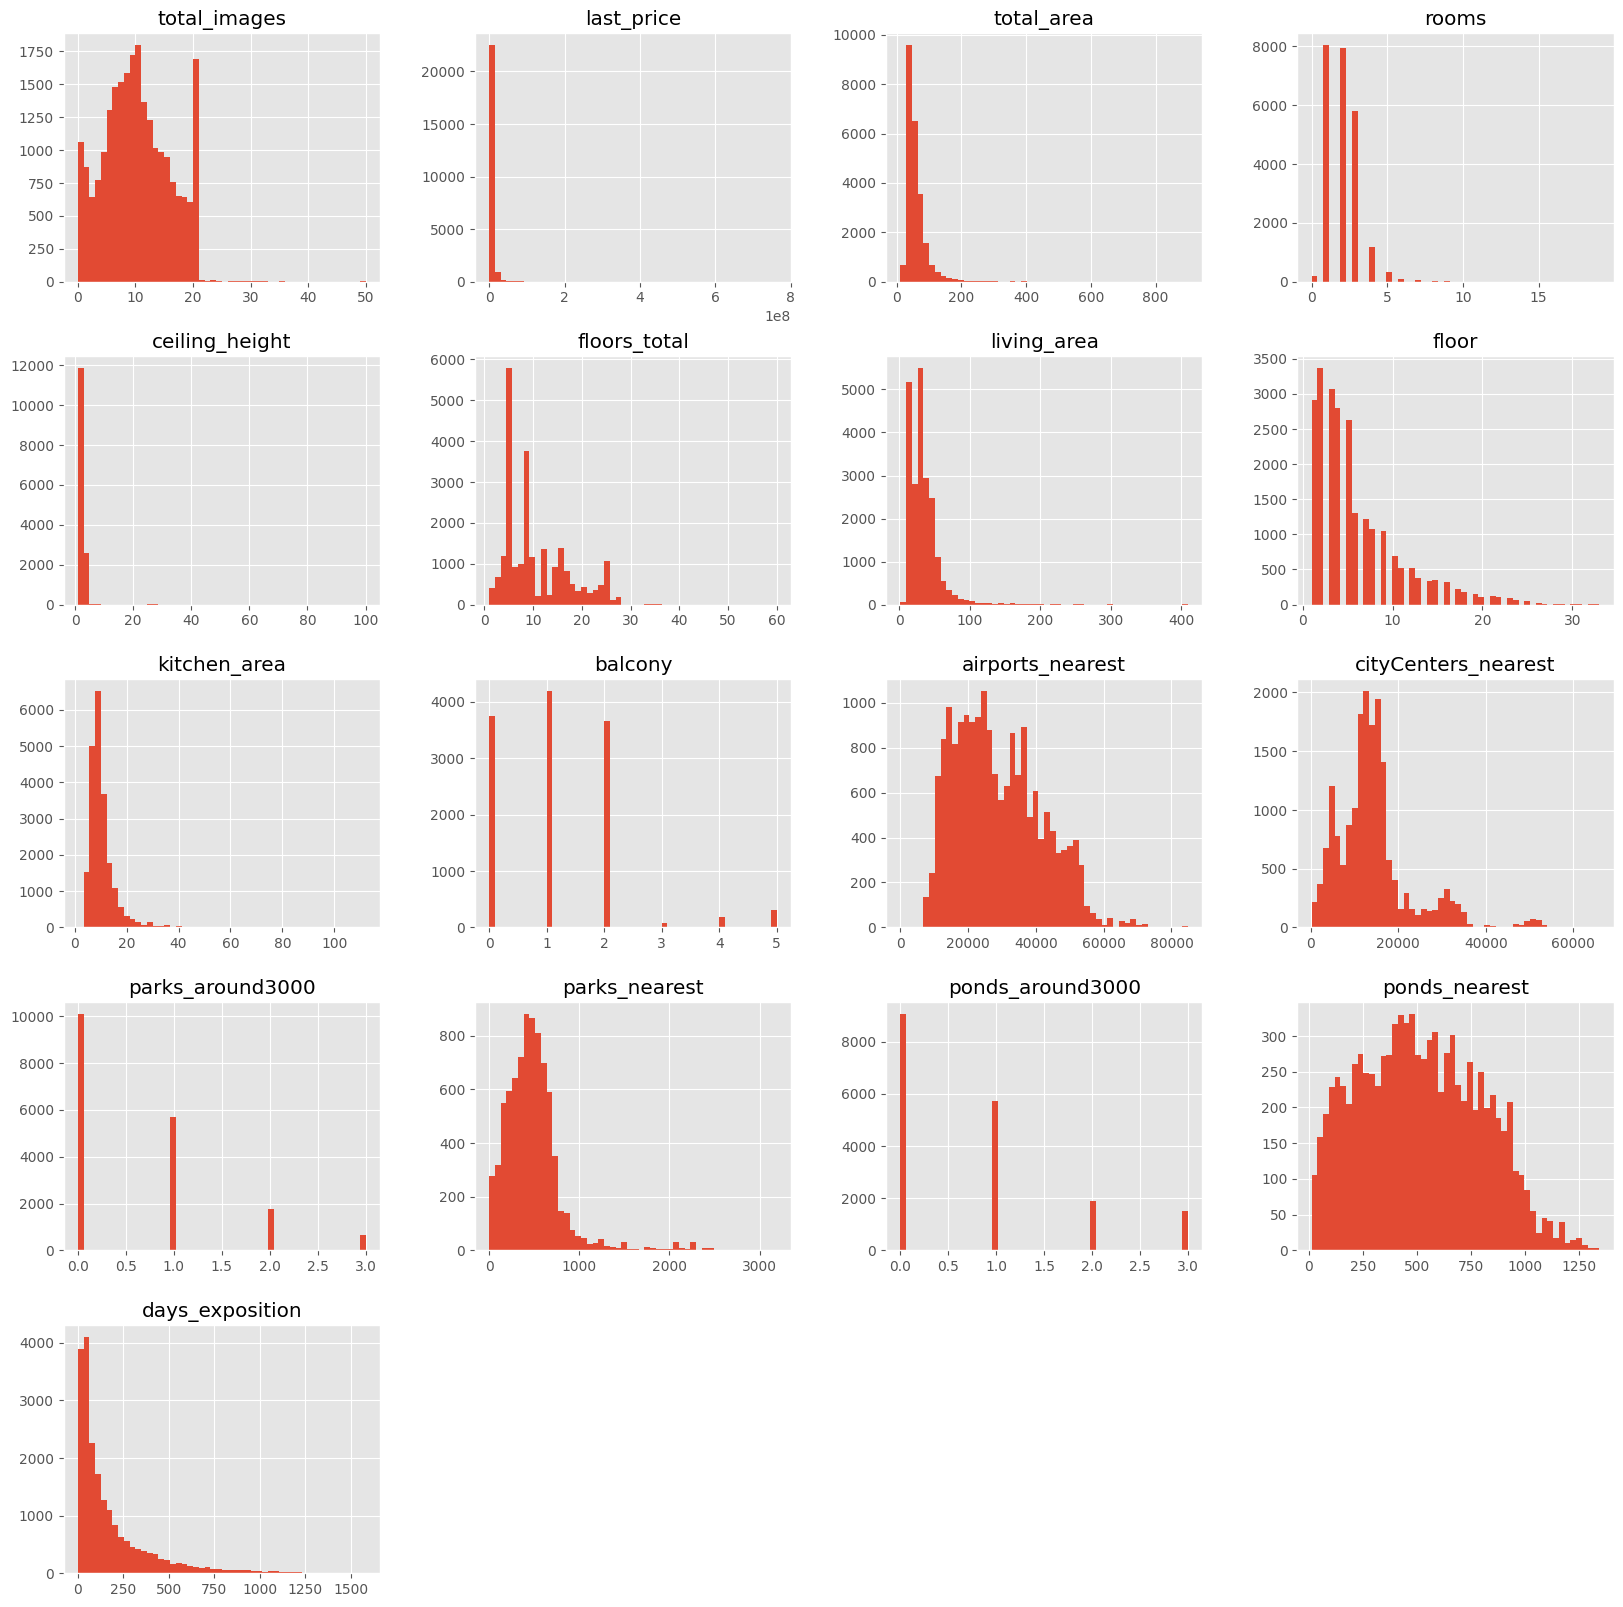

In [120]:
data.hist(bins=50, figsize=(20, 20));

> Больших групп выбросов не видно, далее будем изучать и обрабатывать подробнее 

## Предобработка данных

### Дубликаты

Во избежание ошибок в дальнейшей предобработке сначала изучим единственный столбец типа `object` - `locality_name` на предмет дубликатов

In [121]:
print(f'Уникальных значений {data.locality_name.nunique()}')

Уникальных значений 364


Сначала приведем все значения в нижний регистр

In [122]:
data['locality_name'] = data.locality_name.str.lower()

In [123]:
print(f'Уникальных значений {data.locality_name.nunique()}')

Уникальных значений 364


> Таких дубликатов не было

Проверим наличие явных дубликатов

In [124]:
data.duplicated().sum()

np.int64(0)

> Явных дубликатов нет. Нужно смотреть на данные. Возможно, одна локация названа по-разному

Для российских наименований могут быть дубликаты из-за нерегламентированного использования букв "е" и "ё". Заменим все "ё" на "е"

In [125]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [126]:
print(f'Уникальных значений {data.locality_name.nunique()}')

Уникальных значений 330


> Число уникальных значений уменьшилось, значит такие повторы действительно были

Выведем отсортированные в порядке возрастания частоты появления уникальные значения

In [127]:
names_counts_data = data.locality_name.value_counts(ascending=True)
names_counts_data

locality_name
поселок дзержинского             1
деревня борисова грива           1
деревня тихковицы                1
коттеджный поселок лесное        1
деревня нижняя                   1
                             ...  
пушкин                         369
всеволожск                     398
поселок шушары                 440
поселок мурино                 556
санкт-петербург              15721
Name: count, Length: 330, dtype: int64

У нас есть 'поселки', а есть 'поселки городского типа'. Это тоже может стать источником дубликатов. Проверим нашу гипотезу

In [128]:
data['locality_name'] = (
    data['locality_name']
    .str.replace(' городского типа', '')
)

In [129]:
print(f'Уникальных значений {data.locality_name.nunique()}')

Уникальных значений 329


> Действительно, такой дубликат был

Напоследок отсортируем уникальные значения и посмотрим на еще какие-нибудь дубликаты

In [130]:
names_counts_data = (
    data.locality_name
    .value_counts(ascending=True)
    .sort_index()
    )
names_counts_data

locality_name
бокситогорск     16
волосово         36
волхов          111
всеволожск      398
выборг          237
               ... 
сосновый бор     87
сясьстрой        24
тихвин           49
тосно           104
шлиссельбург     57
Name: count, Length: 329, dtype: int64

> Ручной просмотр значений не дал больше результатов. Положим, что мы избавились от всех дубликатов

### Пропуски

Еще раз выведем пропуски по столбцам

In [131]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посмотрим сколько есть строк, имеющих хотя бы один пропуск

In [132]:
print(f'Есть {data.isna().any(axis=1).sum()} строк с пропусками')

print(f'Они составляют \
{data.isna().any(axis=1).sum() / data.shape[0] * 100:.3f}% от общего числа')

Есть 23449 строк с пропусками
Они составляют 98.945% от общего числа


> Таких строк подавляющее большинство, просто выкинуть их не получится. Будем заполнять обдуманно

Столбец `locality_name` имеет относительно немного пропусков (всего 49 строк - 0.2% от общего объема данных). Эту информацию нам взять негде, введение новой локации 'unknown' не очень оправдано, так что просто выкинем эти строки

То же самое сделаем со столбцом `floors_total`. В нем также относительно мало строк, так что его обработка даст лишь неточность

In [133]:
data.dropna(
    subset=['locality_name', 'floors_total'],
    inplace=True
)

Столбец `days_exposition` имеет > 3000 пропусков, так что стоит пропуски чем-то заполнить, чтобы не терять данные. Выбор среднего или медианы на место пропусков не несет особого смысла для числа дней публикации. 

Эти пропуски могут быть связаны с тем, что на момент архивирования данных соответствующие публикации еще не были сняты. На самом деле мы могли бы узнать дату сбора информации и заполнить все пропуски настоящими значениями, но у нас такой информации нет. Заполним пропуски объектами `pandas.NA`

> Округление добавим для избегания ошибок при изменении типизации

In [134]:
data['days_exposition'] = data['days_exposition'].fillna(pd.NA)

Еще один столбец с большим числом выбросов - `is_apartment`. Можно предположить, что если бы недвижимость действительно была апартаментами, то владелец бы об этом сообщил. Так что все пропуски заменим на `False`

In [135]:
data['is_apartment'] = data['is_apartment'].fillna(False)

C:\Users\Daniil\AppData\Local\Temp\ipykernel_12880\2052809825.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


Аналогично в столбце `balcony`. Если продавец не указал число балконов, значит, скорее всего, их просто нет. Заполним пропуски 0

In [136]:
data['balcony'] = data['balcony'].fillna(0)

Столбец `ceiling_height` заполним средним

In [137]:
data['ceiling_height'] = (
    data['ceiling_height']
    .fillna(data['ceiling_height'].median())
    )

Рассмотрим столбцы `['total_area', 'kitchen_area', 'living_area']`

In [138]:
data[['total_area', 'kitchen_area', 'living_area']].isna().sum()

total_area         0
kitchen_area    2222
living_area     1865
dtype: int64

Исходя из среднего соотношения общей площади с площадью кухни и жилой площадью заполним все пропуски

In [139]:
living_area_coef = (data['living_area'] / data['total_area']).mean()
kitchen_area_coef = (data['kitchen_area'] / data['total_area']).mean()

data['living_area'] = (
    data['living_area']
    .fillna(data['total_area'] * living_area_coef)
)

data['kitchen_area'] = (
    data['kitchen_area']
    .fillna(data['total_area'] * kitchen_area_coef)
)

In [140]:
data[data['total_area'] < data['living_area'] + data['kitchen_area']].shape[0]

123

Посмотрим какие данные остались с пропусками

In [141]:
data[data.columns[data.isna().any()]].dtypes

airports_nearest       float64
cityCenters_nearest    float64
parks_around3000       float64
parks_nearest          float64
ponds_around3000       float64
ponds_nearest          float64
days_exposition        float64
dtype: object

Остались пропуски в столбцах, связанных с локацией. Заполним пропуски в столбцах `airports_nearest` и `cityCenters_nearest` медианным значением подвыборки объектов, имеющих то же значение `locality_name`. Это логично, так как в пределах одной локации разброс расстояний ожидается меньшим, чем если бы брали все данные целиком.

In [142]:
for col in ['airports_nearest', 'cityCenters_nearest']:
    data[col] = data[col].fillna(
        data.groupby('locality_name')[col].transform('median')
    )

Остальные пропуски в столбцах с информацией о локации заполнять медианой не будем. Эти значения получены автоматически на основе картографических данных. Значит если данные не получены, то скорее всего объекта рядом нет (пруды и парки) или до объекта слишком далеко и эту информацию нельзя получить.

Из этих соображений, можем заполнить пропуски в столбцах `['ponds_around3000', 'parks_around3000']` нулями

In [143]:
data[['ponds_around3000', 'parks_around3000']] =\
data[['ponds_around3000', 'parks_around3000']].fillna(0)

Остальные данные оставим незаполненными

Проверим остались ли пропуски

In [144]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5432
cityCenters_nearest      5432
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Пропуски могли остаться, если для данного населенного пункта нет ни одной записи, в которой указано значение в нужных столбцах локаций. Тут уже ничего не поделать - оставим пропуски

### Типизация

Еще раз выведем структуру данных

In [145]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Создадим переменные словарь `col_type_dict`, в котором ключами будут типы данных, а значениями - списки названий столбцов, содержащих данные соответствующего типа

In [146]:
col_type_dict = {

    'float': ['total_area', 'ceiling_height', 'living_area', 'kitchen_area',
              'airports_nearest', 'cityCenters_nearest', 'ponds_nearest', 
              'ponds_nearest'],

    'Int64': ['total_images', 'last_price', 'rooms', 'floors_total', 'floor',
            'balcony', 'days_exposition', 'parks_around3000', 
            'ponds_around3000'],

    'bool': ['is_apartment', 'studio', 'open_plan'],

    'object': ['locality_name']

}

Изменим тип данных в столбцах в соответствии со словарем. Это поможет как избавиться от возможных типовых ошибок, так и оптимизировать затраты памяти на хранение данных.

In [147]:
for type, col_list in col_type_dict.items():
    for col in col_list:
        print(col, data[col].dtypes)
        if type.startswith('Int'):
            data[col] = data[col].round(0)
        data[col] = data[col].astype(type)

total_area float64
ceiling_height float64
living_area float64
kitchen_area float64
airports_nearest float64
cityCenters_nearest float64
ponds_nearest float64
ponds_nearest float64
total_images int64
last_price float64
rooms int64
floors_total float64
floor int64
balcony float64
days_exposition float64
parks_around3000 float64
ponds_around3000 float64
is_apartment bool
studio bool
open_plan bool
locality_name object


Отдельно обработаем столбец `first_day_exposition`, сделав его типом `datetime`

In [148]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'],
    format='%Y-%m-%dT%H:%M:%S'
    )

In [149]:
data.dtypes

total_images                     Int64
last_price                       Int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            Int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            Int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          Int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 Int64
parks_nearest                  float64
ponds_around3000                 Int64
ponds_nearest                  float64
days_exposition                  Int64
dtype: object

## Проведение дополнительных расчетов для дальнейшего исследовательского анализа

Добавим столбец `area_price` с информацией о цене квадратного метра

In [150]:
data['area_price'] = (data['last_price'] / data['total_area']).round(2)

Добавим столбцы `weekday_exposition`, `month_exposition`, `year_exposition` с информацией о дне неделе, месяце и годе публикации объявления 

In [151]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

data['month_exposition'] = data['first_day_exposition'].dt.month

data['year_exposition'] = data['first_day_exposition'].dt.year

Добавим столбец `floor_type` с типом этажа квартиры - "первый", "последний", "другой"

In [152]:
def floor_type_selecting(row):
    '''
    Функция применяется построчно. Для каждого объекта возвращает тип этажа
    квартиры из списка: ['первый', 'последний', 'другой']
    '''
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [153]:
data['floor_type'] = data.apply(floor_type_selecting, axis=1)

Добавим столбец `airports_nearest_rounded_kil` с округленными расстояниями до аэропорта в километрах, округленные до целого

In [154]:
data['cityCenters_rounded_nearest'] = ((data['cityCenters_nearest'] / 1e3)
                                        .round()
                                        .astype('Int64')
                                        )

Выведем первые 5 строк получившейся таблицы

In [155]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_rounded_nearest
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.00,2,755.00,<NA>,120_370.37,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,0,NaN,81,82_920.79,1,12,2018,первый,19
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.00,2,574.00,558,92_785.71,3,8,2015,другой,14
3,0,64900000,159.00,2015-07-24,3,2.65,14,89.83,9,False,...,84.00,3,234.00,424,408_176.10,4,7,2015,другой,7
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.00,1,48.00,121,100_000.00,1,6,2018,другой,8


Во время предобработки данных были установлены и исправлены дубликаты в столбце `locality_name`. Основной причиной их возникновения оказались:

* Использование "ё" вместо "е"
* Одновременное использование и "поселков", и "поселков городского типа"

Также были устранены некоторые пропуски в данных:

* При низкой представленности пропусков в столбцах, записи удалялись
* Данные о числе балконов, типе квартиры, числе парков и прудов поблизости заполнялись 0 или False. Так как если что-то не указано, можно предположить, что этого нет
* Данные о расстояниях до центра и аэропорта заполнялись медианой по населенному пункту
* Все остальные пропуски оставили без изменений, но не удалялись, чтобы не терять ценную информацию

Для улучшения кода привели все столбцы к соответствующим им типам данных

## Проведение исследовательского анализа данных

### Изучение распределения основных характеристик данных

Напишем функцию подсчета доверительного интервала через квартили (пусть это будет размах усов boxplot)

In [156]:
def boxplot_spread(k, series, only_positive=True, message=True):
    '''
    Функция подсчета размаха "усов" через вычисление квантилей
    '''
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    
    if only_positive:
        low_b, upp_b = (max(0, q1 - k * iqr), q3 + k * iqr)
    else:
        low_b, upp_b = (q1 - k * iqr, q3 + k * iqr)
    
    if message:
        print(f'{series.name}: размах "усов": [{low_b:.2f}, {upp_b:.2f}]')

    return (low_b, upp_b)

#### Общая, жилая и кухонная площади

Сначала просто посмотрим на распределение данных

In [157]:
display(data[['total_area', 'living_area', 'kitchen_area']].describe())

,total_area,living_area,kitchen_area
count,23_565.00,23_565.00,23_565.00
mean,60.32,34.56,10.57
std,35.66,22.35,6.09
min,12.00,2.00,1.30
25%,40.00,19.00,7.00
50%,52.00,30.00,9.00
75%,69.70,42.10,12.00
max,900.00,409.70,112.00


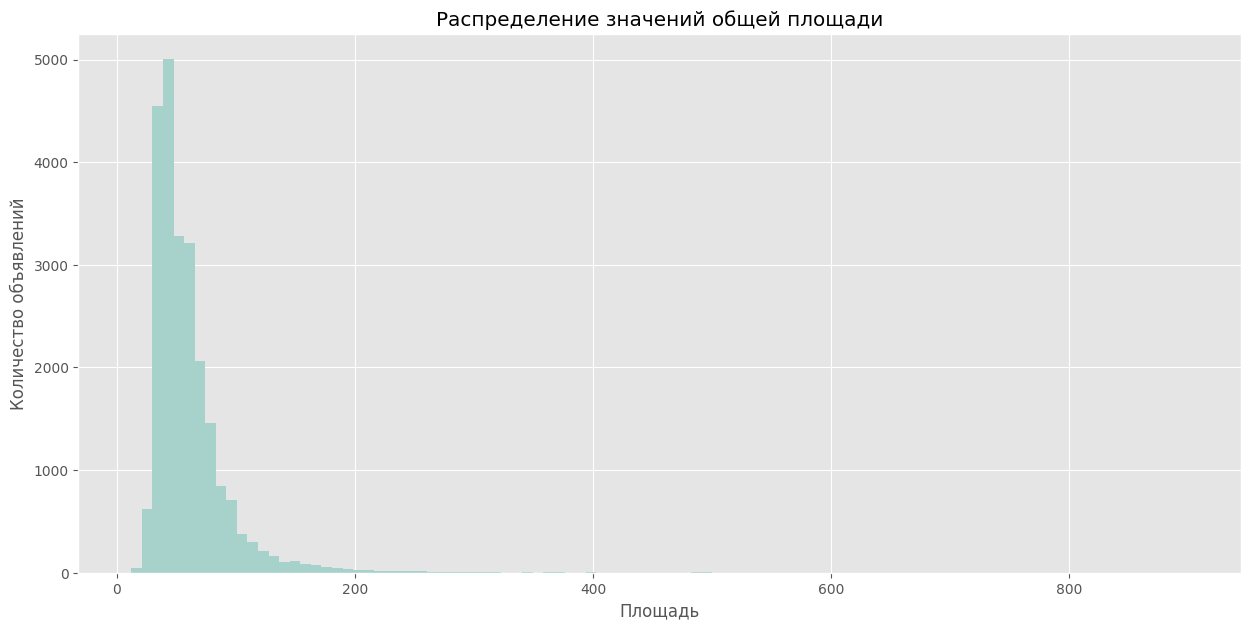

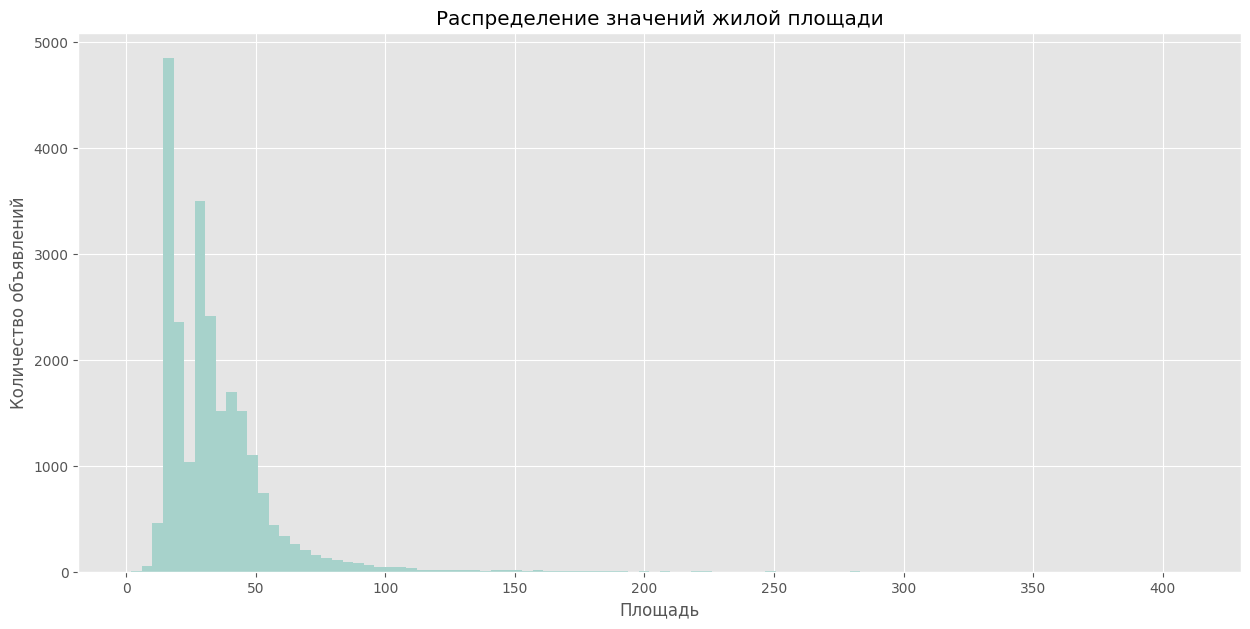

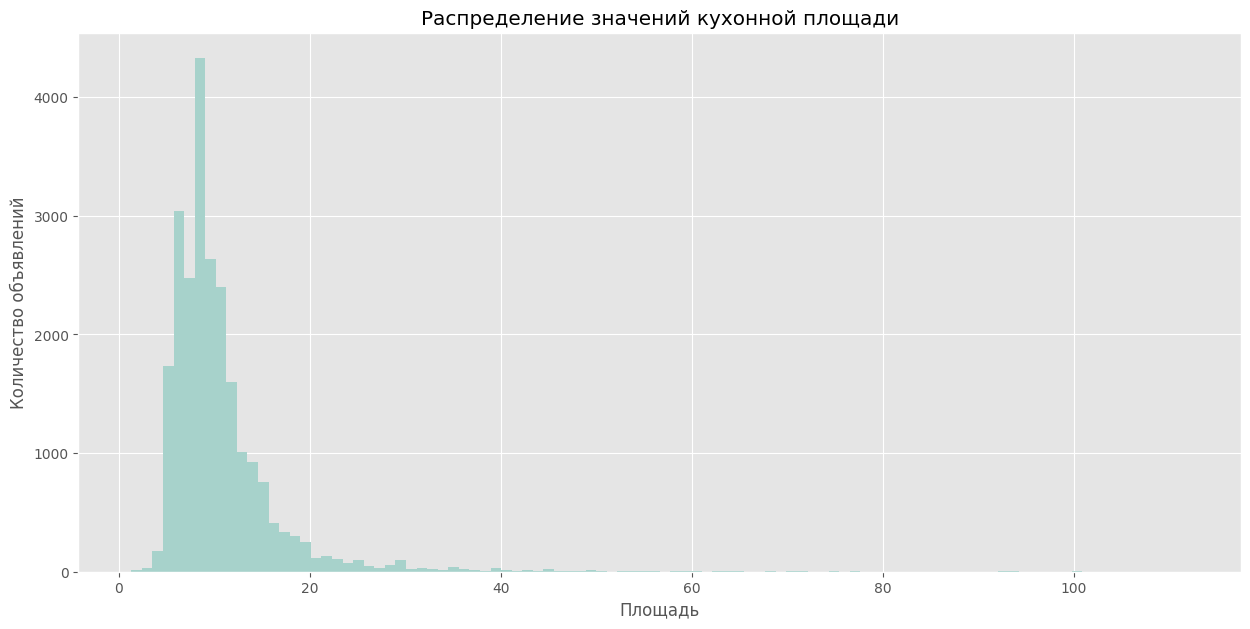

In [158]:
d = {
    'total_area': [200, 'общей площади'],
    'living_area': [100, 'жилой площади'],
    'kitchen_area': [30, 'кухонной площади']
}

for col in d:

    data[col].hist(bins = 100, figsize = (15, 7), color='#A7D2CB')
    plt.title(f'Распределение значений ' + d[col][1])
    plt.xlabel('Площадь') 
    plt.ylabel('Количество объявлений')
    plt.show()
del d

У нас есть объекты с общими площадами более $400\text{м}^2$. Посмотрим на 10 квартир с наибольшей площадью. Выведем для них характеристики, связанные с площадями, названием населенного пункта и цене

In [159]:
(
    data
    .sort_values(by=['total_area', 'living_area', 'kitchen_area'])
    .tail(10)
    .loc[:, ['total_area', 'living_area', 'rooms', 'locality_name', 
          'kitchen_area', 'last_price']]
)

,total_area,living_area,rooms,locality_name,kitchen_area,last_price
12401,495.00,347.50,7,санкт-петербург,25.00,91500000
5893,500.00,282.47,6,санкт-петербург,40.00,230000000
15016,500.00,282.47,4,санкт-петербург,93.67,150000000
8018,507.00,301.50,5,санкт-петербург,45.50,84000000
4237,517.00,332.00,7,санкт-петербург,22.00,50000000
5358,590.00,409.00,15,санкт-петербург,100.00,65000000
15651,618.00,258.00,7,санкт-петербург,70.00,300000000
3117,631.00,356.48,7,санкт-петербург,60.00,140000000
12859,631.20,322.30,7,санкт-петербург,19.50,140000000
19540,900.00,409.70,12,санкт-петербург,112.00,420000000


> Видим, что не все большие значения являются ошибками. Например, самая большая квартира имеет 12 комнат, а ее жилая площадь сильно меньше общей. Стоимость также соответствует описанию. Можем предположить, что это старая коммунальная квартира, которых осталось много в Санкт-Петербурге.

Для обычных жилых квартир ожидается соотнесение полезной и общей площадей 1:1. То есть жилая площадь примерно вдвое меньше общей. Посмотрим какие соотношения площадей есть в наших данных. Для этого сначала создадим столбец `area_coef` - отношение общей и полезной площадей (полезная - жилая и кухонная)

In [160]:
data['area_coef'] = data['total_area'] / (data['living_area'] + data['kitchen_area'])

In [161]:
data['area_coef'].describe()

count   23_565.00
mean         1.34
std          0.15
min          0.63
25%          1.27
50%          1.33
75%          1.40
max          7.32
Name: area_coef, dtype: float64

Удалим строки, где `area_coef` меньше 1 - такого быть не может, a ошибку искать нецелесообразно ввиду малого представления в данных

In [162]:
data = data[data['area_coef'] >= 1]

Посмотрим на остальные выбросы

Сохраним все выбросы по столбцам `total_area`, `living_area`, `kitchen_area`, `area_coef` в переменную `data_unusual_area`

In [163]:
outliers_mask = np.array([False for _ in range(data.shape[0])])

for col in ['total_area', 'living_area', 'kitchen_area', 'area_coef']:
    low_b, upp_b = boxplot_spread(2, data[col])
    mask = (data[col] < low_b) | (data[col] > upp_b)
    outliers_mask += mask

total_area: размах "усов": [0.00, 129.24]
living_area: размах "усов": [0.00, 88.00]
kitchen_area: размах "усов": [0.00, 22.00]
area_coef: размах "усов": [1.02, 1.65]


In [164]:
data_unusual_area = (
    data
    .loc[outliers_mask]   
    .sort_values(by='area_coef')
)

In [165]:
data_unusual_area.loc[:, ['total_area', 'living_area', 'rooms',
                          'locality_name', 'kitchen_area', 'last_price',
                          'area_coef']].sort_values(by='total_area')

,total_area,living_area,rooms,locality_name,kitchen_area,last_price,area_coef
9412,16.00,13.00,0,санкт-петербург,3.00,2100000,1.00
8873,20.00,14.00,1,санкт-петербург,6.00,2950000,1.00
5312,20.00,16.00,0,деревня кудрово,3.75,1800000,1.01
19477,20.00,16.00,0,санкт-петербург,3.75,2300000,1.01
10964,20.00,16.00,1,всеволожск,3.75,1150000,1.01
...,...,...,...,...,...,...,...
5358,590.00,409.00,15,санкт-петербург,100.00,65000000,1.16
15651,618.00,258.00,7,санкт-петербург,70.00,300000000,1.88
3117,631.00,356.48,7,санкт-петербург,60.00,140000000,1.52
12859,631.20,322.30,7,санкт-петербург,19.50,140000000,1.85


> В данных по этому критерию не так много выбросов. Здесь нельзя наверняка сказать ошибка ли это или особенность объекта, поэтому просто удалять данные не хочется. 

Предварительно сохранили выбросы в переменную `data_unusual_area`. Теперь можно удалить их из основного набора

In [166]:
data = data.drop(data_unusual_area.index)

Выведем гистограммы распределений получившихся данных

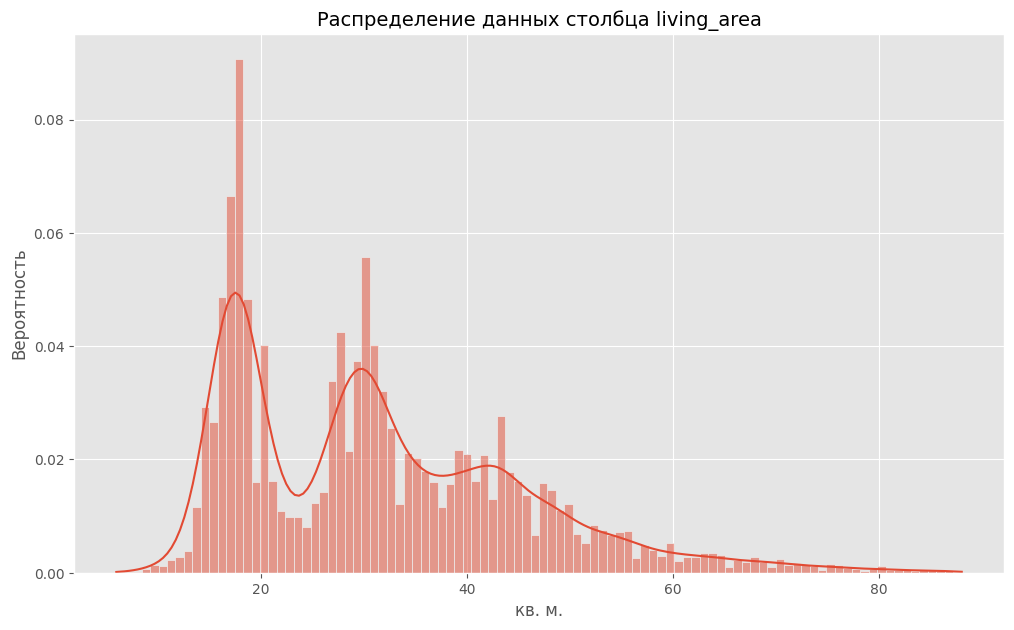

In [167]:
plt.figure(figsize=(12, 7))

col = ['total_area', 'living_area', 'kitchen_area'][1]
sns.histplot(data[col], bins=100, kde=True, stat='density')

plt.title(f'Распределение данных столбца {data[col].name}', fontsize=14)
# plt.xlabel(r'$\text{м}^2$', fontsize=12)
plt.xlabel('кв. м.', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)

plt.show()

> На графике living_area наблюдаются пики, предположительно соответствующие количеству комнат. 

Проверим это предположение

<Figure size 800x600 with 0 Axes>

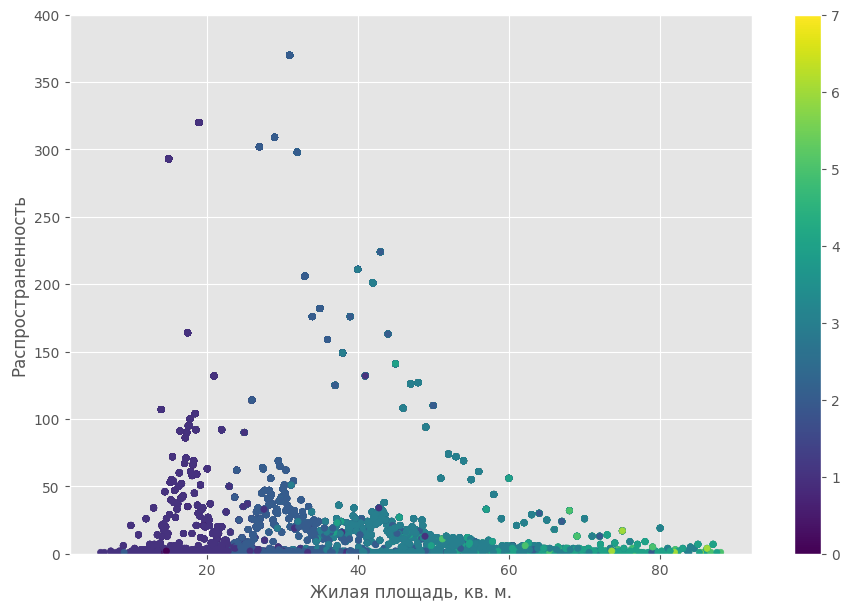

In [168]:
plt.figure(figsize=(8, 6))

(
    data
    .assign(count=data.groupby('living_area').living_area.transform('size'))
    .plot(
        kind='scatter',
        figsize=(11, 7),
        x='living_area',
        y='count', 
        c=data['rooms'],
        cmap='viridis',
        colorbar=True,
        ylim=(0, 400),
#         xlabel=r'Жилая площадь, $\text{м}^2$',
        xlabel='Жилая площадь, кв. м.',
        ylabel='Распространенность',
        sharex=False
    )
);

> Действительно можно видеть, что первому пику соответствуют в основном однокомнатные квартиры, второму - двухкомнатные и.т.д.

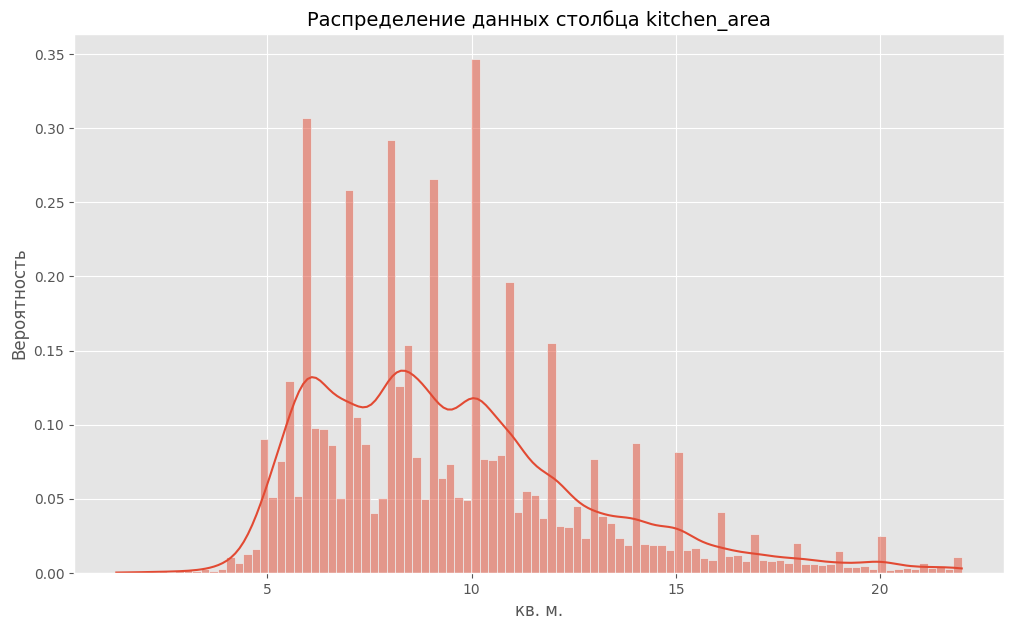

In [169]:
plt.figure(figsize=(12, 7))

col = ['total_area', 'living_area', 'kitchen_area'][2]
sns.histplot(data[col], bins=100, kde=True, stat='density')

plt.title(f'Распределение данных столбца {data[col].name}', fontsize=14)
# plt.xlabel(r'$\text{м}^2$', fontsize=12)
plt.xlabel('кв. м.', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)

plt.show()

> Для kitchen_area наблюдаются ярковыраженные пики, которые можно посмотреть отдельно:

In [170]:
data['kitchen_area'].value_counts().head(15)

kitchen_area
6.00     1283
10.00    1203
8.00     1079
9.00     1071
7.00     1048
11.00     760
12.00     614
8.50      408
5.50      398
14.00     352
5.00      351
15.00     312
13.00     298
6.30      292
6.20      276
Name: count, dtype: int64

> Действительно, есть некоторые "стандарты" размеров кухонь. Причем интересно, что наиболее часто встречающиеся размеры целочисленные. Причиной может служить норматив строения кухонь в советских и постсоветских комплексах. Например, 6 кв.м. - стандарт Хрущевок, а 8-10 кв.м. - Брежневок. При этом при выставлении на продажу размеры просто округляют до целого - отсюда и такие пики в данных 

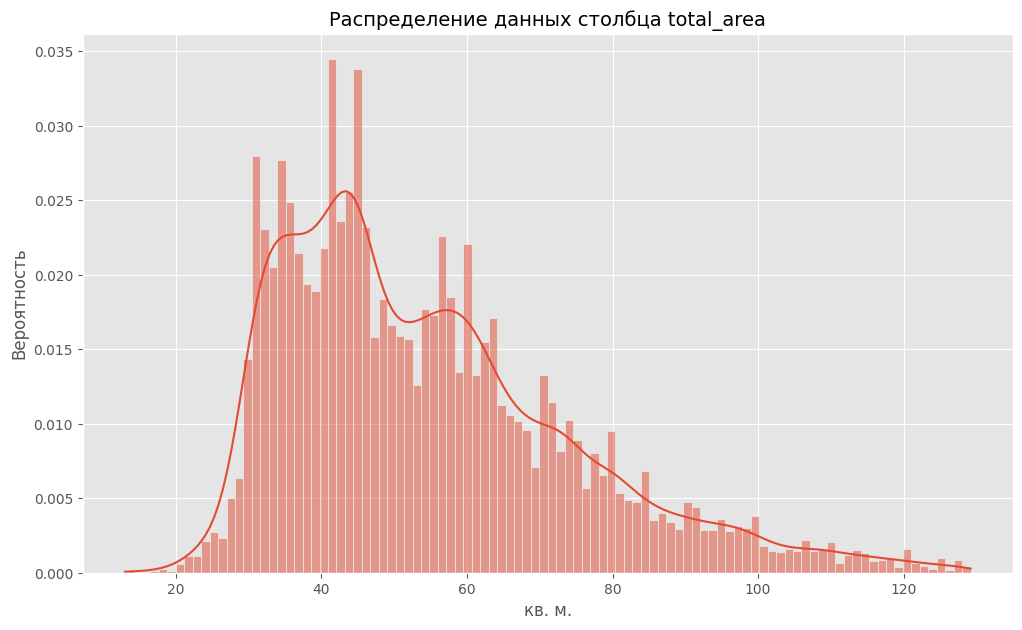

In [171]:
plt.figure(figsize=(12, 7))

col = ['total_area', 'living_area', 'kitchen_area'][0]
sns.histplot(data[col], bins=100, kde=True, stat='density')

plt.title(f'Распределение данных столбца {data[col].name}', fontsize=14)
# plt.xlabel(r'$\text{м}^2$', fontsize=12)
plt.xlabel('кв. м.', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)

plt.show()

> Здесь пики менее выражены, чем у living_area, они также вероятнее всего соответствуют числу комнат. Данные чуть менее ровные, так как на общую площадь жалья может влиять большое количество факторов - точно сходу не сказать. Однако тренд, как было сказано, прослеживается

#### Цена объекта

Посмотрим на распределение данных в столбце

In [172]:
data.last_price.describe()

count        21_608.00
mean      5_291_761.86
std       3_567_842.97
min         430_000.00
25%       3_350_000.00
50%       4_500_000.00
75%       6_210_000.00
max     124_000_000.00
Name: last_price, dtype: Float64

<Axes: >

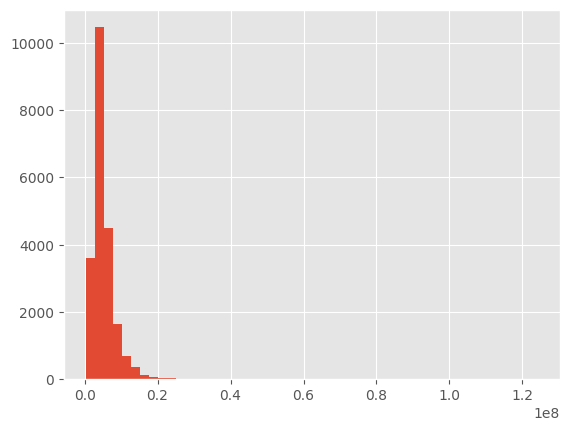

In [173]:
data.last_price.hist(bins=50)

Посмотрим на самые дорогие объекты

In [174]:
(
    data
    .sort_values(by='last_price')
    .tail(10)
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_rounded_nearest,area_coef
22633,18,47500000,125.00,2016-06-27,3,2.65,8,67.00,2,False,...,0,NaN,252,380_000.00,0,6,2016,другой,6,1.43
19229,17,47700000,125.10,2016-06-21,4,2.65,8,65.93,8,False,...,2,473.00,202,381_294.96,1,6,2016,последний,7,1.62
7136,0,48000000,108.00,2018-02-01,3,2.65,5,61.00,2,False,...,3,415.00,144,444_444.44,3,2,2018,другой,3,1.45
18770,20,49000000,125.00,2019-01-29,3,2.91,6,73.90,6,False,...,3,258.00,<NA>,392_000.00,1,1,2019,последний,6,1.50
10011,3,53000000,90.00,2019-03-21,3,3.15,5,73.00,3,False,...,3,564.00,40,588_888.89,3,3,2019,другой,2,1.06
22709,20,59000000,127.50,2016-12-21,4,3.00,12,85.00,8,False,...,3,234.00,635,462_745.10,2,12,2016,другой,7,1.30
12223,20,59000000,127.50,2017-01-24,4,3.00,12,85.00,8,False,...,3,234.00,5,462_745.10,1,1,2017,другой,7,1.30
13919,12,65000000,129.00,2017-09-25,3,2.65,6,72.00,5,False,...,3,569.00,13,503_875.97,0,9,2017,другой,0,1.42
6462,2,82000000,114.00,2015-12-17,3,2.65,5,78.50,4,False,...,3,69.00,651,719_298.25,3,12,2015,другой,3,1.16
4996,20,124000000,124.50,2017-10-12,4,3.00,4,67.20,2,False,...,3,172.00,45,995_983.94,3,10,2017,другой,2,1.43


> Просмотр не дал ничего интересного. Вся дорогая недвижимость находится в Питере недалеко от центра, так что, возможно, цены действительно такие высокие.

Поступим здесь так же, как и с выбросами по площадям 

In [175]:
l_bound, r_bound = boxplot_spread(2, data['last_price'])

data_unusual_price = data[
    (data['last_price'] < l_bound) | 
    (data['last_price'] > r_bound)
    ]

data_unusual_price

last_price: размах "усов": [0.00, 11930000.00]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_rounded_nearest,area_coef
19,16,14200000,121.00,2019-01-09,3,2.75,16,76.00,8,False,...,0,NaN,97,117_355.37,2,1,2019,другой,13,1.38
63,2,20000000,118.00,2018-09-11,3,3.00,9,68.00,7,False,...,1,779.00,37,169_491.53,1,9,2018,другой,5,1.40
179,5,14800000,108.70,2019-04-11,3,4.00,5,72.40,5,False,...,0,NaN,<NA>,136_154.55,3,4,2019,последний,3,1.35
233,17,19800000,118.00,2017-12-15,3,2.80,25,62.00,3,False,...,1,474.00,<NA>,167_796.61,4,12,2017,другой,12,1.41
260,8,17250000,102.40,2014-12-09,3,2.65,8,53.20,3,False,...,0,NaN,<NA>,168_457.03,1,12,2014,другой,11,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,20,12000000,87.00,2019-04-28,3,2.65,10,58.00,5,False,...,1,628.00,<NA>,137_931.03,6,4,2019,другой,14,1.26
23559,20,13800000,108.60,2016-09-12,3,2.65,19,70.60,7,False,...,1,503.00,354,127_071.82,0,9,2016,другой,5,1.34
23587,7,12100000,88.00,2017-07-07,3,2.65,10,49.71,5,False,...,2,359.00,200,137_500.00,4,7,2017,другой,8,1.38
23608,22,14000000,80.00,2017-11-10,3,2.65,11,44.10,6,False,...,1,232.00,19,175_000.00,4,11,2017,другой,12,1.45


In [176]:
data = data.drop(data_unusual_price.index)

Теперь посмотрим как распределены данные без выбросов

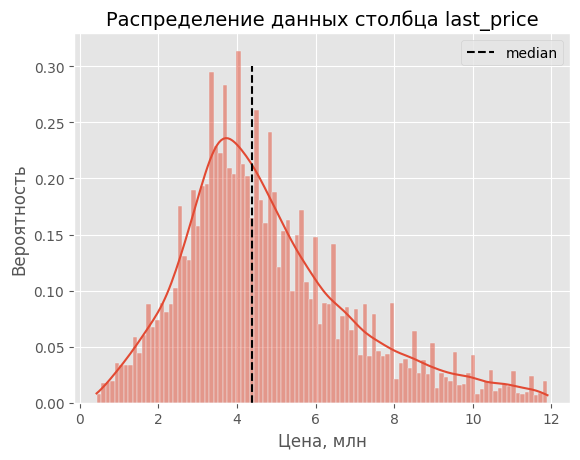

In [177]:
col = 'last_price'
sns.histplot(data[col] / 1e6, bins=100, kde=True, stat='density')
plt.vlines((data[col] / 1e6).median(), 0, 0.3, ls='dashed', color='k',
           label='median')

plt.title(f'Распределение данных столбца {data[col].name}', fontsize=14)
plt.xlabel('Цена, млн', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)
plt.legend()

plt.show()

> У нас асиметричное нормальное распределение. Видны отдельные пики. Предполагаем, что это тоже признаки округления

Выведем 20 самых распространенных значений

In [178]:
data.last_price.value_counts().head(20)

last_price
4500000    330
3500000    283
3600000    255
4200000    252
4300000    252
4000000    249
3300000    240
3800000    239
3200000    230
4100000    226
3700000    225
3400000    221
5500000    219
3100000    216
3900000    213
4600000    211
5200000    201
4800000    195
5000000    192
5100000    186
Name: count, dtype: Int64

> Действительно, наше предположение подтвердилось

#### Количество комнат

In [179]:
data.rooms.describe()

count   20_690.00
mean         1.93
std          0.90
min          0.00
25%          1.00
50%          2.00
75%          3.00
max          6.00
Name: rooms, dtype: Float64

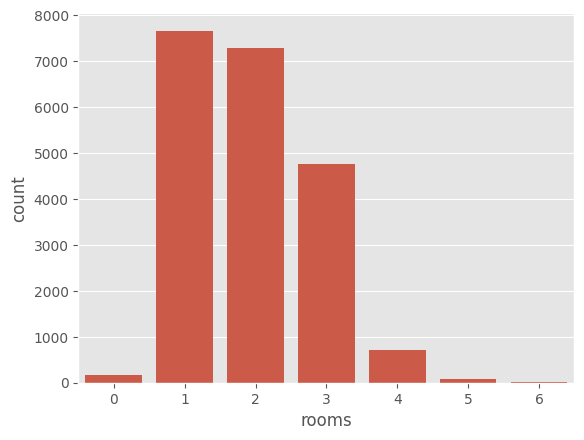

In [180]:
sns.countplot(data=data, x='rooms');

> Здесь из странного только жилье без комнат. Но таких осталось только 39 штук, так что просто удаляем

In [181]:
data = data[data['rooms'] > 0]

#### Высота потолков

In [182]:
data['ceiling_height'].describe()

count   20_524.00
mean         2.69
std          0.73
min          1.00
25%          2.60
50%          2.65
75%          2.66
max         32.00
Name: ceiling_height, dtype: float64

<Axes: >

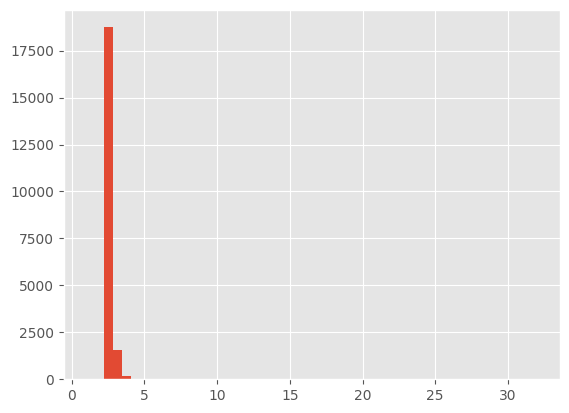

In [183]:
data['ceiling_height'].hist(bins=50)

Посмотрим самые высокие потолки

In [184]:
data.sort_values(by='ceiling_height').loc[:, ['ceiling_height', 'locality_name']].tail(18)

,ceiling_height,locality_name
17496,20.00,санкт-петербург
20507,22.60,санкт-петербург
5076,24.00,санкт-петербург
6246,25.00,кронштадт
9379,25.00,санкт-петербург
355,25.00,гатчина
14382,25.00,поселок новый свет
4643,25.00,санкт-петербург
18545,25.00,санкт-петербург
11285,25.00,луга


> Можно предположить, что самые 32 - метровые потолки на самом деле имеют высоту 3.2 м. Однако таких строк очень мало (16 строк). Просто удалим 

In [185]:
data = data.loc[
    (data['ceiling_height'] <= 8) &
    (data['ceiling_height'] >= 2)
    ]

Построим график распределения отфильтрованных данных

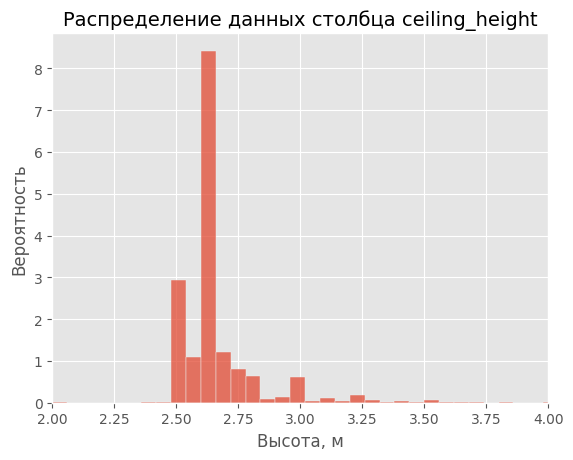

In [186]:
col = 'ceiling_height'
sns.histplot(data[col], bins=100, kde=False, stat='density')

plt.title(f'Распределение данных столбца {data[col].name}', fontsize=14)
plt.xlabel('Высота, м', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)
plt.xlim((2, 4))

plt.show()

In [187]:
data.ceiling_height.value_counts().head(10)

ceiling_height
2.65    8677
2.50    3416
2.60    1577
2.70    1406
2.55     961
2.75     777
2.80     761
3.00     743
3.20     184
2.56     135
Name: count, dtype: int64

> Наиболее часто встречающиеся высоты также имеют пересечение с нормами строительства советских и постсоветских зданий

#### Тип этажа квартиры

In [188]:
data['floor_type'].value_counts()

floor_type
другой       15004
последний     2841
первый        2656
Name: count, dtype: int64

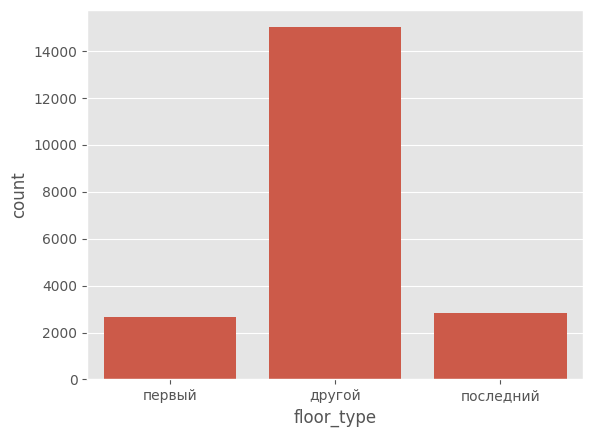

In [189]:
sns.countplot(data=data, x='floor_type');

> Тут сказать особо нечего. Ожидаемо, что особенных этажей будет меньше

#### Общее количество этажей в доме

In [190]:
data['floors_total'].describe()

count   20_501.00
mean        10.70
std          6.57
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: Float64

Text(0.5, 1.0, 'Распределение записей по количеству этажей в доме')

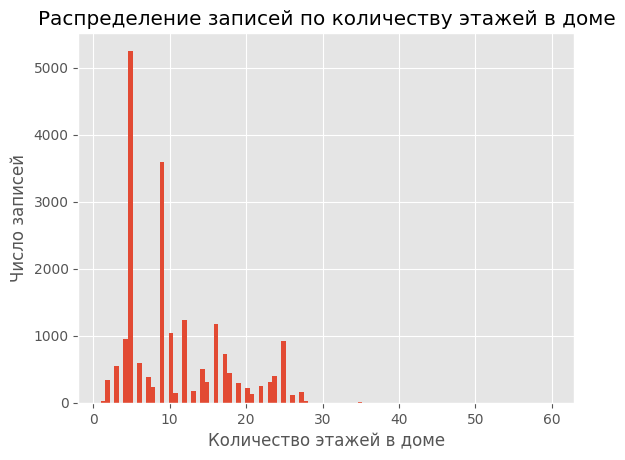

In [191]:
data['floors_total'].hist(bins=100)
plt.xlabel('Количество этажей в доме')
plt.ylabel('Число записей')
plt.title('Распределение записей по количеству этажей в доме')

In [192]:
data['floors_total'].value_counts().head(10)

floors_total
5     5251
9     3585
12    1237
16    1170
10    1034
4      944
25     921
17     727
6      595
3      553
Name: count, dtype: Int64

> Также явно выделяются типовые дома - пятиэтажки, девятиэтажки и.т.д.

Посмотрим на последние 10 самых высоких домов

In [193]:
(
    data
    .sort_values(by='floors_total')
    .loc[:, ['floor', 'floors_total', 'locality_name', 'last_price']]
    .tail(10)
)

,floor,floors_total,locality_name,last_price
1917,30,35,санкт-петербург,10150000
20938,22,35,санкт-петербург,9900000
9186,3,35,санкт-петербург,6500000
2966,15,35,санкт-петербург,4300000
15982,9,35,санкт-петербург,5900000
12960,13,35,санкт-петербург,6140000
11079,29,36,санкт-петербург,9200000
397,28,36,санкт-петербург,5990000
16731,18,52,санкт-петербург,3978000
2253,4,60,кронштадт,3800000


> В Кронштадте 60-этажных домов нет, так что всего этажей 6 - в данных ошибка. Ее можно просто поправить.
>
> А вот 52-этажное здание в Питере есть - это интересный выброс, но не ошибка

In [194]:
data.loc[2253, 'floors_total'] = 6

#### Расстояние до центра города

In [195]:
data['cityCenters_rounded_nearest'].describe()

count   15_348.00
mean        15.04
std          8.55
min          0.00
25%         11.00
50%         14.00
75%         17.00
max         66.00
Name: cityCenters_rounded_nearest, dtype: Float64

Text(0.5, 1.0, 'Распределение записей по удаленности от центра города')

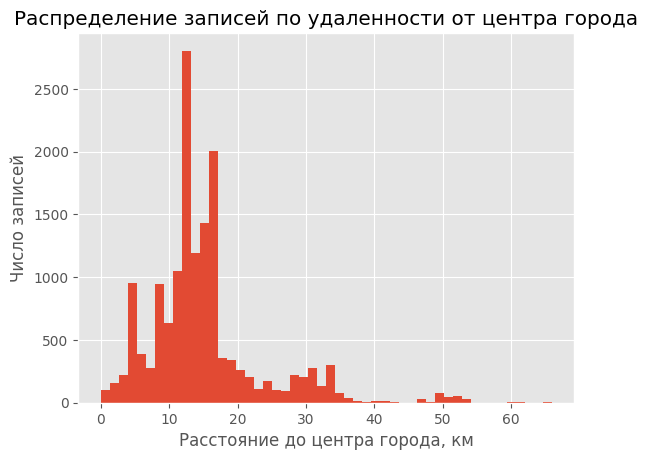

In [196]:
data['cityCenters_rounded_nearest'].hist(bins=50)
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Число записей')
plt.title('Распределение записей по удаленности от центра города')

Посотрим на самое частое расстояние

In [197]:
data['cityCenters_rounded_nearest'].mode()[0]

np.int64(12)

Посмотрим что это за объекты. Ожидаем, что это все будет в одном населенном пункте

In [198]:
data[data['cityCenters_rounded_nearest'] == 12]['locality_name'].value_counts()

locality_name
санкт-петербург    1502
Name: count, dtype: int64

> Да, все такие дома находятся в Питере. Это можем быть, например, один район новостроек. Или это какое-то среднее расстояние, принятое для округления машиной

Теперь обратим внимание на группу объектов с расстоянием около 50 км. Тоже ожидаем, что это все один поселок 

In [199]:
(
    data
    .loc[(data['cityCenters_rounded_nearest'] > 45) &
          (data['cityCenters_rounded_nearest'] < 55),
        'locality_name']
    .value_counts()
)

locality_name
ломоносов      119
кронштадт       90
петергоф        23
зеленогорск     15
Name: count, dtype: int64

> Так как мы взяли широкий участок данных, то и получили несколько населенных пунктов - все ожидаемо, на выбросы не похоже

#### Расстояние до ближайшего парка

In [200]:
data['parks_nearest'].describe()

count   6_375.00
mean      488.06
std       326.29
min         1.00
25%       290.00
50%       456.00
75%       613.00
max     3_190.00
Name: parks_nearest, dtype: float64

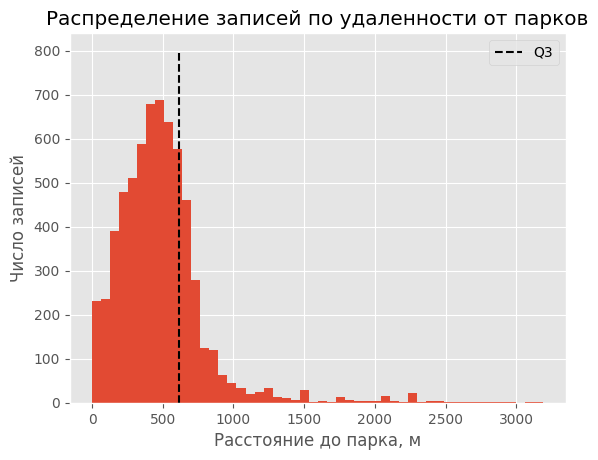

In [201]:
data['parks_nearest'].hist(bins=50)
plt.vlines((data['parks_nearest']).quantile(0.75), 0, 800, ls='dashed',
           color='k', label='Q3')
plt.xlabel('Расстояние до парка, м')
plt.ylabel('Число записей')
plt.title('Распределение записей по удаленности от парков')
plt.legend();

In [202]:
data.parks_nearest.isna().sum() 

np.int64(14126)

> Большая часть продаваемой недвижимости, среди такой, где парк вообще есть, находится на расстоянии менее 1км от ближайшего парка. 
>
> Однако у ~15 тыс. записей парки находятся слишком далеко, и информации о них нет, так что выборка непредставительна, но позволяет проследить связь с ценой на недвижимость

### Изучение скорости продажи квартиры

Посмотрим как распределен параметр `days_exposition`

In [203]:
data['days_exposition'].describe()

count   18_006.00
mean       173.10
std        211.31
min          1.00
25%         44.00
50%         91.00
75%        219.00
max      1_580.00
Name: days_exposition, dtype: Float64

Text(0, 0.5, 'Число записей')

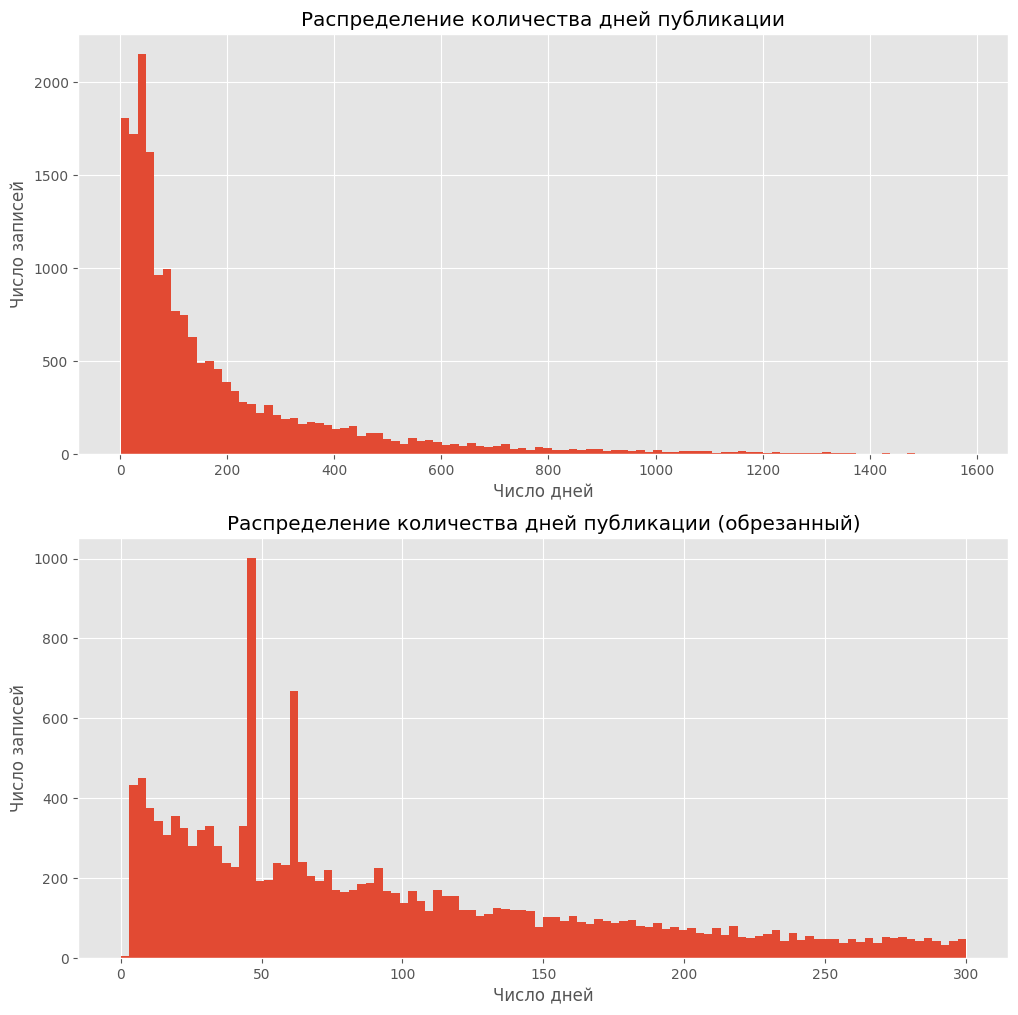

In [204]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
fig.figsize=(20, 10)

data['days_exposition'].hist(
    bins=100,
    range=(0, 300),
    ax=axs[1]
)

data['days_exposition'].hist(
    bins=100,
    ax=axs[0]
)

axs[0].set_title('Распределение количества дней публикации')
axs[0].set_xlabel('Число дней')
axs[0].set_ylabel('Число записей')

axs[1].set_title('Распределение количества дней публикации (обрезанный)')
axs[1].set_xlabel('Число дней')
axs[1].set_ylabel('Число записей')

Посмотрим на пиковое значение

In [205]:
data.days_exposition.value_counts().head(5)

days_exposition
45    847
60    511
7     207
30    188
4     157
Name: count, dtype: Int64

> Виден явный пик на 45 и 60 днях. Это может быть какое-то пороговое число дней на сайте с продажей. После него, например, надо зайти в объявление и подтвердить актуальность. Не все так делают, отсюда и резкий пик

Чтобы понять какие значения можно считать необычайно долгими выбросами, воспользуемся определением выбросов через межквартильный интервал - вычисление "доверительного интервала" мы уже реализовали в функции `boxplot_spread`. Вызовем ее для наших данных

In [206]:
l_emission_limit, r_emission_limit =\
boxplot_spread(
    k=1.5,
    series=data['days_exposition'],
    only_positive=True, 
    message=False
)

q1 = data['days_exposition'].quantile(0.25)
q2 = data['days_exposition'].quantile(0.5)
q3 = data['days_exposition'].quantile(0.75)

print('Вместе со статистикой по столбцу можно сделать следующее распределение объявлений:\n')
print(f'\t{l_emission_limit:.2f} < days_exposition < {q1:.2f} - очень быстрые')
print(f'\t{q1:.2f} < days_exposition < {q2:.2f}    - быстрые')
print(f'\t{q2:.2f} < days_exposition < {q3:.2f}    - долгие')
print(f'\t{q3:.2f} < days_exposition < {r_emission_limit:.2f}    - очень долгие')

Вместе со статистикой по столбцу можно сделать следующее распределение объявлений:

	0.00 < days_exposition < 44.00 - очень быстрые
	44.00 < days_exposition < 91.00    - быстрые
	91.00 < days_exposition < 219.00    - долгие
	219.00 < days_exposition < 481.50    - очень долгие


### Факторы, влияющие на стоимость квартир

Посмотрим на связь числовых данных. Выведем матрицу коэффициентов корреляции Пирсона

In [207]:
(
    data
    .loc[:, 'total_images':'year_exposition'] # Уберем вспомогательные
    .select_dtypes(include='number')
    .corr()
    .style.background_gradient()
)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_price,weekday_exposition,month_exposition,year_exposition
total_images,1.000000,0.155928,0.096430,0.071879,0.012564,0.013712,0.086381,0.036364,0.049781,0.041670,-0.005137,-0.031658,0.015175,-0.012230,-0.001049,0.002414,-0.034754,0.121513,-0.006505,0.004624,0.147363
last_price,0.155928,1.000000,0.696838,0.443726,0.329957,0.211372,0.590007,0.143218,0.508477,0.070170,-0.043470,-0.348315,0.251860,0.041063,0.289318,-0.059473,0.073387,0.629133,-0.012964,0.007889,0.004462
total_area,0.096430,0.696838,1.000000,0.813001,0.248847,-0.019090,0.933558,-0.028690,0.476172,0.062005,-0.030456,-0.130834,0.083523,0.002367,0.119220,-0.040751,0.111553,-0.076592,-0.007433,0.012167,-0.060865
rooms,0.071879,0.443726,0.813001,1.000000,0.090748,-0.225533,0.898435,-0.173613,0.088063,0.008075,-0.054839,-0.082550,0.065919,-0.044130,0.047426,-0.013977,0.083283,-0.227592,-0.000008,0.002109,-0.034328
ceiling_height,0.012564,0.329957,0.248847,0.090748,1.000000,-0.023854,0.200335,-0.020044,0.249798,-0.042361,-0.072474,-0.227033,0.178255,-0.057005,0.162340,-0.081496,0.056625,0.189976,-0.010142,0.004402,-0.040839
floors_total,0.013712,0.211372,-0.019090,-0.225533,-0.023854,1.000000,-0.169835,0.675351,0.354280,0.157410,0.101244,-0.028727,-0.140888,0.115471,-0.024900,0.031328,-0.041062,0.344950,0.008855,0.015627,0.000904
living_area,0.086381,0.590007,0.933558,0.898435,0.200335,-0.169835,1.000000,-0.133899,0.214432,0.019332,-0.053079,-0.118026,0.103412,-0.034163,0.098450,-0.026994,0.100623,-0.155654,-0.004184,0.005187,-0.050157
floor,0.036364,0.143218,-0.028690,-0.173613,-0.020044,0.675351,-0.133899,1.000000,0.232763,0.162051,0.071774,-0.011374,-0.097191,0.083400,-0.016152,0.030614,-0.039903,0.249359,0.007305,0.020962,0.005977
kitchen_area,0.049781,0.508477,0.476172,0.088063,0.249798,0.354280,0.214432,0.232763,1.000000,0.091778,0.016349,-0.119472,-0.004562,0.070066,0.104243,-0.059441,0.055479,0.210620,-0.008572,0.022975,-0.038593
balcony,0.041670,0.070170,0.062005,0.008075,-0.042361,0.157410,0.019332,0.162051,0.091778,1.000000,0.045296,0.056789,-0.070516,0.037880,-0.042229,0.025522,-0.023128,0.037325,-0.001949,0.004231,0.004569


И выведем нужный нам срез

In [208]:
corr_coef = (
    data
    .loc[:, 'total_images':'year_exposition']
    .select_dtypes(include='number')
    .corr()
    .loc[:, 'last_price']
    .drop(['last_price', 'area_price'], axis=0)
    .sort_values(ascending=False)
)

corr_coef

total_area             0.70
living_area            0.59
kitchen_area           0.51
rooms                  0.44
ceiling_height         0.33
ponds_around3000       0.29
parks_around3000       0.25
floors_total           0.21
total_images           0.16
floor                  0.14
days_exposition        0.07
balcony                0.07
parks_nearest          0.04
month_exposition       0.01
year_exposition        0.00
weekday_exposition    -0.01
airports_nearest      -0.04
ponds_nearest         -0.06
cityCenters_nearest   -0.35
Name: last_price, dtype: float64

> Отсюда сразу наглядно видно, что если говорить о линейном характере, то наибольшая зависимость у цены от площадей - сначала идет общая, затем жилая и кухонная. Потом идут количество комнат и высота потолков. Все остальные характеристики уже незначительны. 
>
> Интересно то, что близость к центру снижает цену объекта

Для названных параметров построим графики зависимостей 

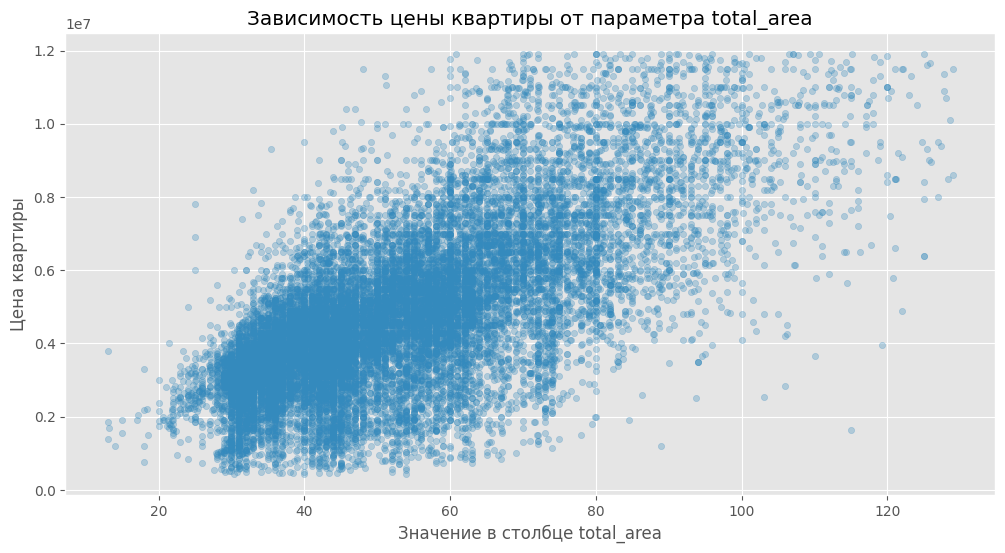

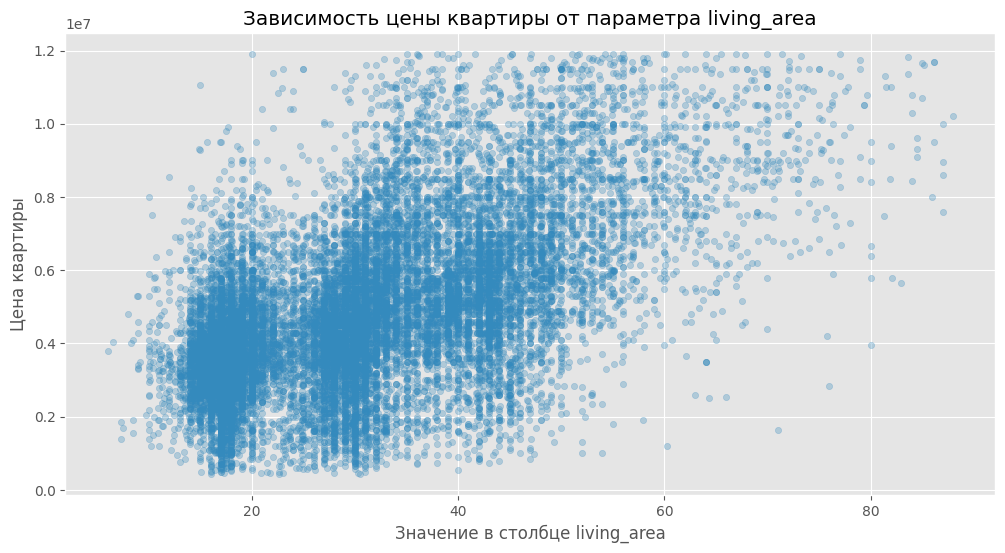

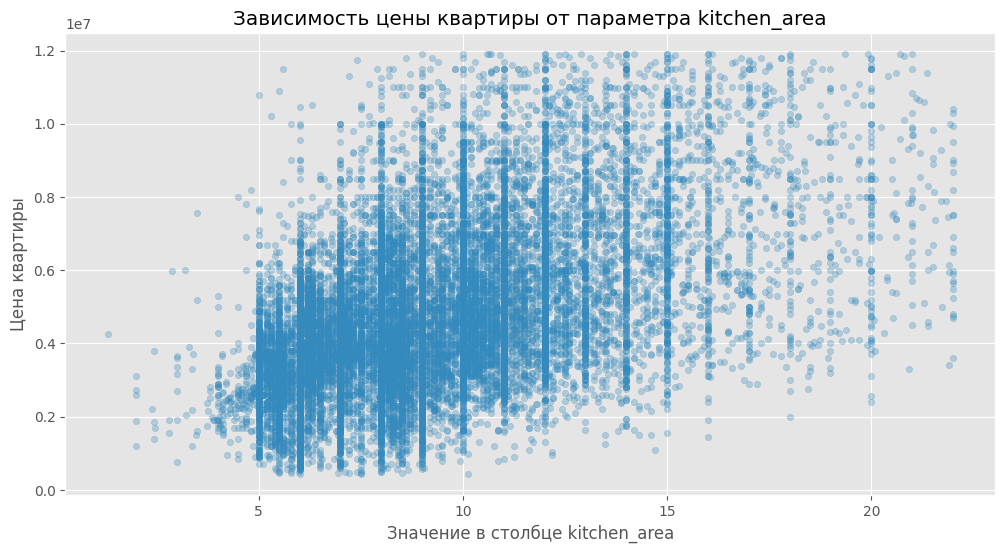

In [209]:
for col in corr_coef[abs(corr_coef) > 0.5].index:
    data.plot(
        x=col,
        y='last_price',
        kind='scatter',
        alpha=0.3,
        figsize=(12, 6),
        ylabel='Цена квартиры',
        xlabel=f'Значение в столбце {col}',
        title=f'Зависимость цены квартиры от параметра {col}'
    )

> В целом, можно видеть общую тенденцию к росту цены с ростом площади. Как и на гистограмме распределения, можно четко видеть три более интенсивных пятна, соответствующих, как кажется, 1, 2, 3 - комнатным квартирам. А у площадей кухонь - отдельные стандартные размеры

Посмотрим как зависит цена квартиры от количества комнат

In [210]:
print(f'Коэффициент корреляции Пирсона: {corr_coef["rooms"]:.2f}')

Коэффициент корреляции Пирсона: 0.44


> Число комнат сильно связано с жалой площадью, что мы получили ранее. Поэтому ожидаемо, что и число комнат так или иначе будет коррелировать с ценой

Построим `barplot` со средней ценой по числу комнат

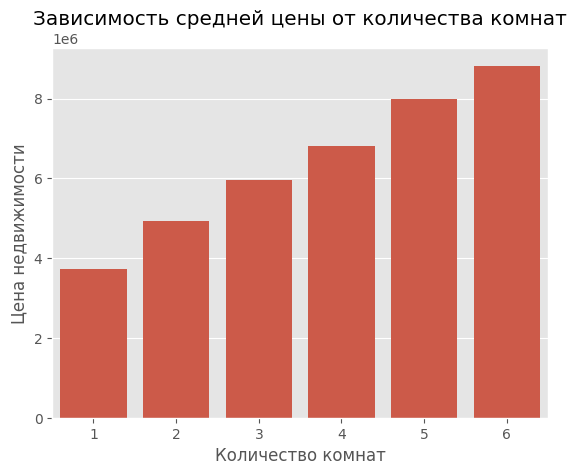

In [211]:
sns.barplot(
    data=data, 
    x='rooms', 
    y='last_price',
    errorbar=None # Без доверительного интервала
    )

plt.xlabel('Количество комнат')
plt.ylabel('Цена недвижимости')
plt.title('Зависимость средней цены от количества комнат');

> Как и ожидалось, с увеличением числа комнат растет и цена недвижимости

Аналогично рассмотрим статистику по Типу этажа

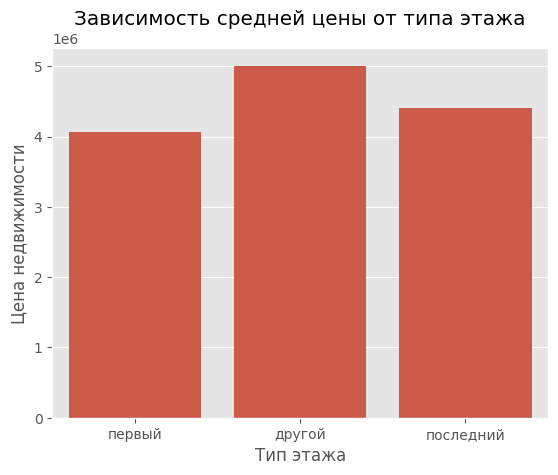

In [212]:
sns.barplot(
    data=data, 
    x='floor_type', 
    y='last_price',
    errorbar=None, # Без доверительного интервала
    # estimator='median'
    )

plt.xlabel('Тип этажа')
plt.ylabel('Цена недвижимости')
plt.title('Зависимость средней цены от типа этажа');

И посотмрим есть ли зависимость цены от этажа непосредственно

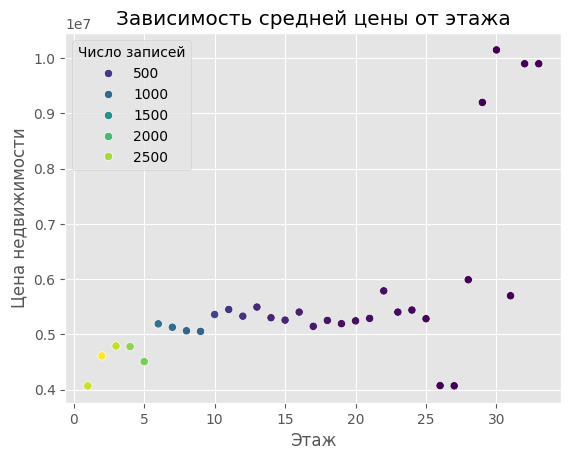

In [213]:
sns.scatterplot(
    data=(
        data
        .groupby('floor')['last_price']
        .agg(['mean', 'count'])
        .reset_index()
        .astype(float)
        .rename(columns={'count': 'Число записей'})
          ),
    x='floor', 
    y='mean',
    hue='Число записей',
    palette='viridis',
)

plt.xlabel('Этаж')
plt.ylabel('Цена недвижимости')
plt.title('Зависимость средней цены от этажа');

> Видим, что на этажах, где записей больше, с ростом этажа в среднем цена растет. Скорее всего это связано с типом дома - квартиры в старых пятиэтажках дешевле, чем в современных небоскребах. 

Попробуем построить такой же график, но для общего числа этажей

In [214]:
data['floors_total']

1        11
2         5
5        12
6        26
7        24
         ..
23692     5
23693     9
23695     5
23696     3
23698     5
Name: floors_total, Length: 20501, dtype: Int64

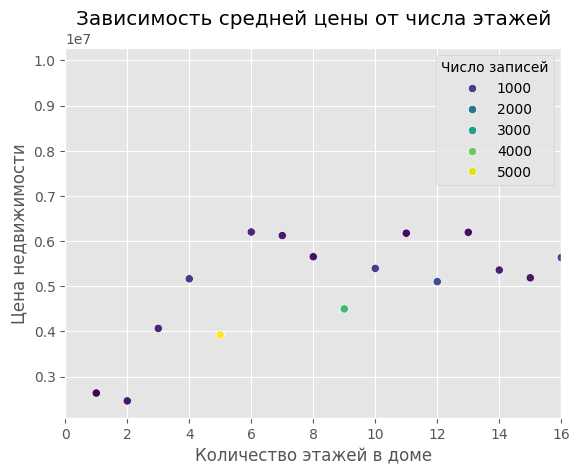

In [215]:
sns.scatterplot(
    data=(
        data
        .groupby('floors_total')['last_price']
        .agg(['mean', 'count'])
        .reset_index()
        .astype(float)
        .rename(columns={'count': 'Число записей'})
          ),
    x='floors_total', 
    y='mean',
    hue='Число записей',
    palette='viridis',
)

plt.xlim(0, 16)
plt.xlabel('Количество этажей в доме')
plt.ylabel('Цена недвижимости')
plt.title('Зависимость средней цены от числа этажей');

> Действительно, с "ростом" дома растет и цена недвижимости в нем

Проведем изучение стредней стоимости недвижимости по городам по году выставления

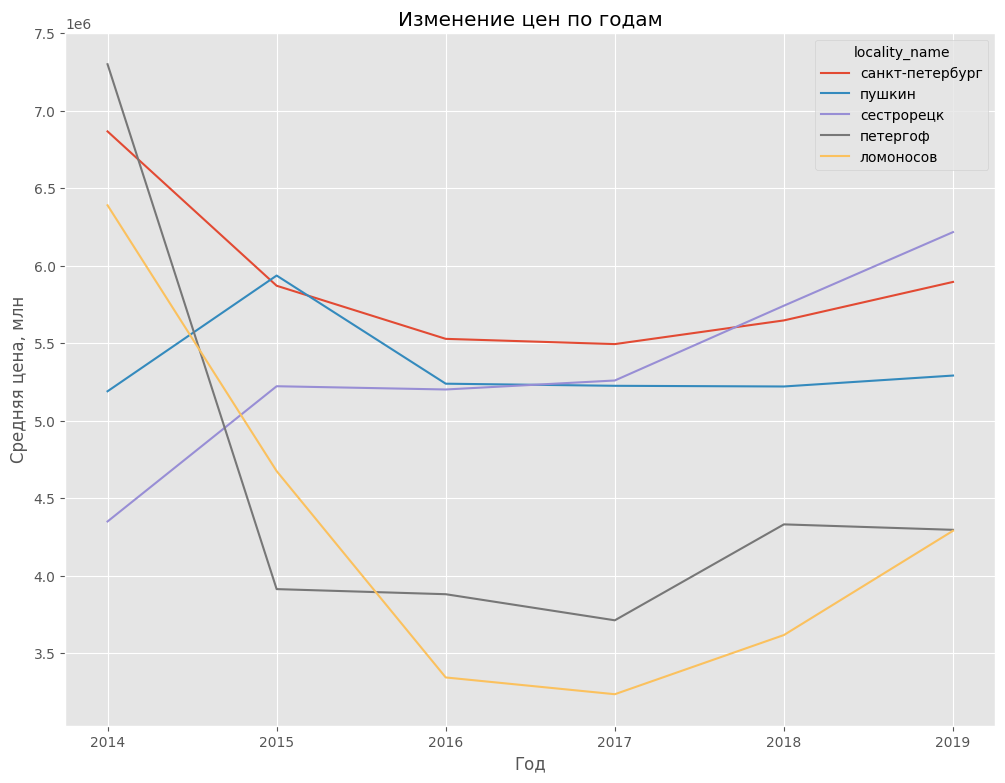

In [216]:
(
    data
    .pivot_table(
        index='locality_name',
        columns='year_exposition',
        values='last_price',
        aggfunc='mean'
    )
    .rename_axis(columns=None)
    .assign(total=lambda x: x.sum(axis=1))
    .sort_values(by='total', ascending=False)
    .head(5) 
    .drop(columns=['total'], axis=0)
    .T
    .plot(
        figsize=(12, 9),
        kind='line',
        xlabel='Год',
        ylabel='Средняя цена, млн',
        title='Изменение цен по годам'
        )
);

<Axes: title={'center': 'Зависимость цены квартиры от года выставления'}, xlabel='Год выставления', ylabel='Цена квартиры'>

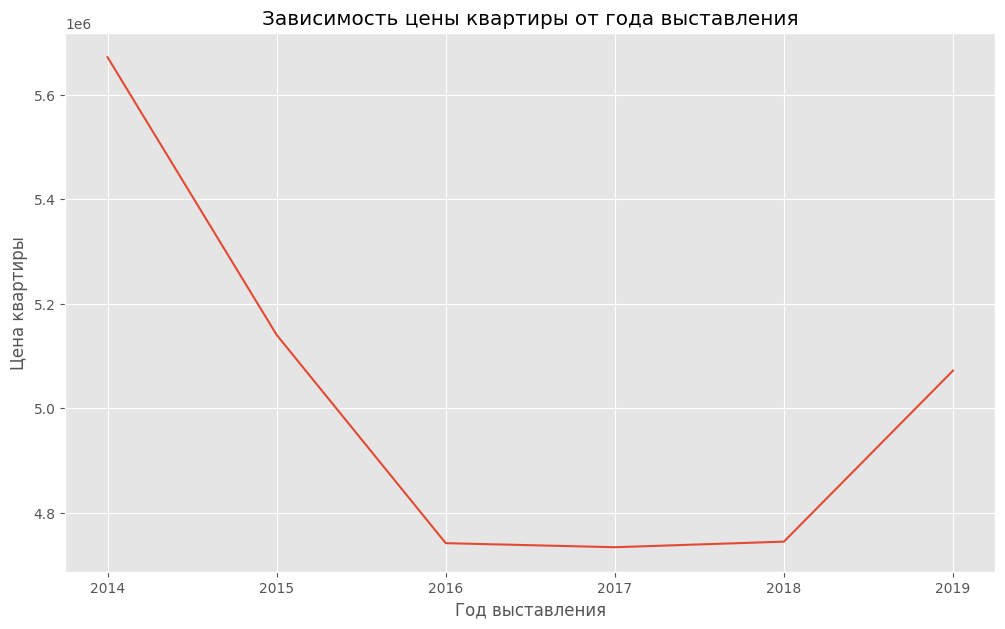

In [217]:
(
    data
    .pivot_table(
        index='year_exposition',
        values='last_price',
        aggfunc='mean'
    )
    .plot(
        figsize=(12, 7),
        kind='line',
        xlabel='Год выставления',
        ylabel='Цена квартиры',
        title='Зависимость цены квартиры от года выставления',
        legend=''
    )
)

> Какой-то четкой тенденции не наблюдается. Проверим количество объявлений по году выкладывания

In [218]:
data['year_exposition'].value_counts()

year_exposition
2018    7518
2017    7103
2019    2478
2016    2378
2015     944
2014      80
Name: count, dtype: int64

> Хоть записей из 2014 не так много, но дальше оно резко приростает, а тенденция не меняется - до 2016 идет резкое падение цен.  

Посмотрим влияет ли на цену день недели или месяц выставления

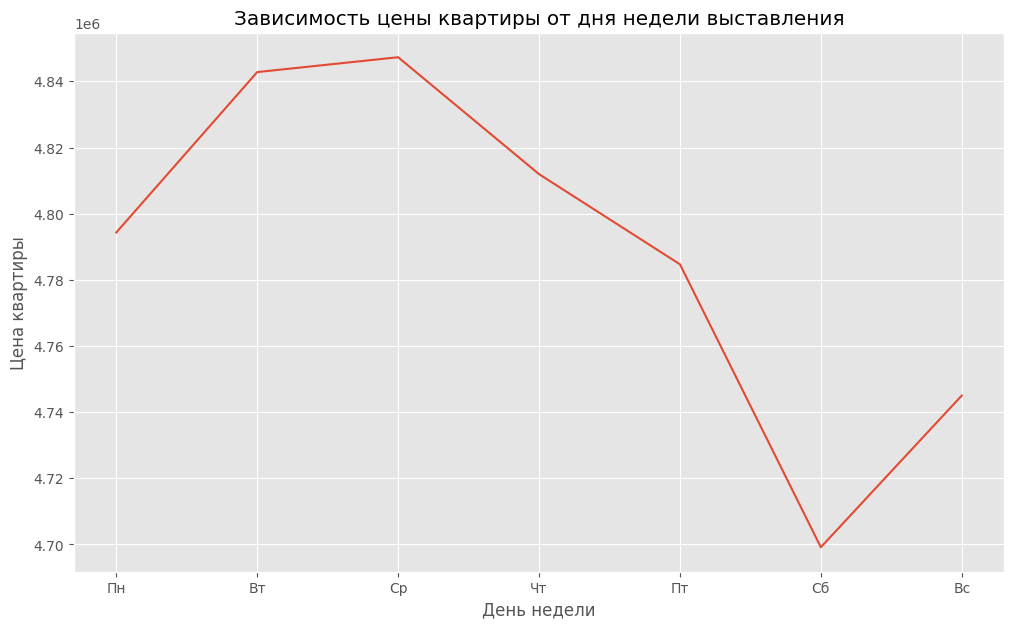

In [219]:
(
    data
    .pivot_table(
        index='weekday_exposition',
        values='last_price',
        aggfunc='mean'
    )
    .plot(
        figsize=(12, 7),
        kind='line',
        xlabel='День недели',
        ylabel='Цена квартиры',
        title='Зависимость цены квартиры от дня недели выставления',
        legend=''
    )
)

plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']);


> Интересно, что в Субботу цена минимальна, хотя в выходные спрос должен расти, а за ним и цена. Посмотрим сколько данных для каждой группы есть

In [220]:
data['weekday_exposition'].value_counts().sort_index()

weekday_exposition
0    3134
1    3610
2    3442
3    3676
4    3475
5    1674
6    1490
Name: count, dtype: int64

> На выходных выкладывали меньше, что странно. Но все равно какой-то четкой зависимости нет

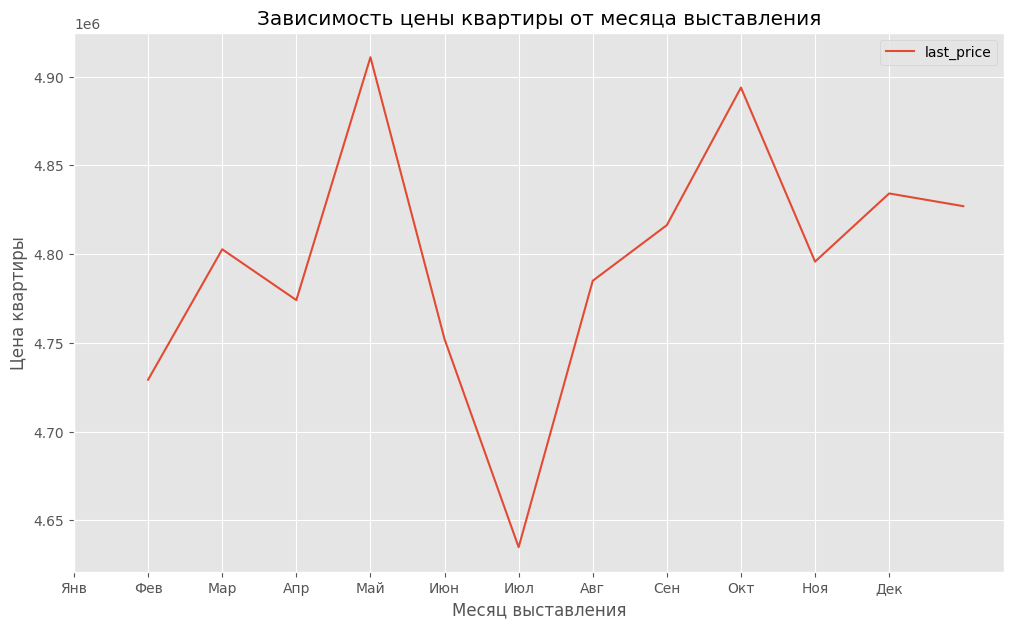

In [221]:
(
    data
    .pivot_table(
        index='month_exposition',
        values='last_price',
        aggfunc='mean'
    )
    .plot(
        figsize=(12, 7),
        kind='line',
        xlabel='Месяц выставления',
        ylabel='Цена квартиры',
        title='Зависимость цены квартиры от месяца выставления'
    )
)

plt.xticks(range(12), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 
               'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']); 

In [222]:
data.month_exposition.value_counts().sort_index()

month_exposition
1     1276
2     2306
3     2243
4     2070
5     1092
6     1555
7     1450
8     1510
9     1692
10    1848
11    2038
12    1421
Name: count, dtype: int64

> Можно сделать вывод, что самые высокие цены весной и осенью, а вот зимой и летом цены ниже - там и записей меньше. Наверное, все на праздниках или отдыхе и никто не хочет заниматься продажами.

#### Статистика цен квадратного метра

Также можем посмотреть на средние цены недвижимости по населенным пунктам. Выведем табличку со средней общей ценой и средней ценой метра в населенных пунктах с самым большим числом объявлений

In [223]:
(
    data
    .groupby(by='locality_name')
    .agg({
            'area_price': ['mean'],
            'last_price': ['mean', 'count']
            })
    .round(2)
    .sort_values(by=('last_price', 'count'), ascending=False)
    .head(10)
    .sort_values(by=('area_price',  'mean'), ascending=False)
)

area_price   last_price       
                        mean         mean  count
locality_name                                   
санкт-петербург   105_234.54 5_626_383.25  13019
пушкин            100_180.54 5_265_469.21    326
деревня кудрово    92_646.84 4_264_931.41    269
поселок парголово  90_720.89 4_512_739.49    313
поселок мурино     84_941.77 3_708_379.29    508
поселок шушары     78_252.88 4_093_960.00    425
колпино            75_303.36 3_833_149.23    330
гатчина            68_581.35 3_386_997.82    293
всеволожск         67_000.50 3_698_439.19    365
выборг             58_367.32 3_075_090.50    221

> Как можно видеть, наиболее дорогая площадь в столице региона - Санкт-Петербурге. Наименьшая - в Выборге

#### Статистика изменения цен по километрам

Посмотрим как в Петербурге меняется цена при удалении от центра

<Axes: title={'center': 'Зависимость цены от удаленности'}, xlabel='Расстояние от центра, км', ylabel='Цена, млн'>

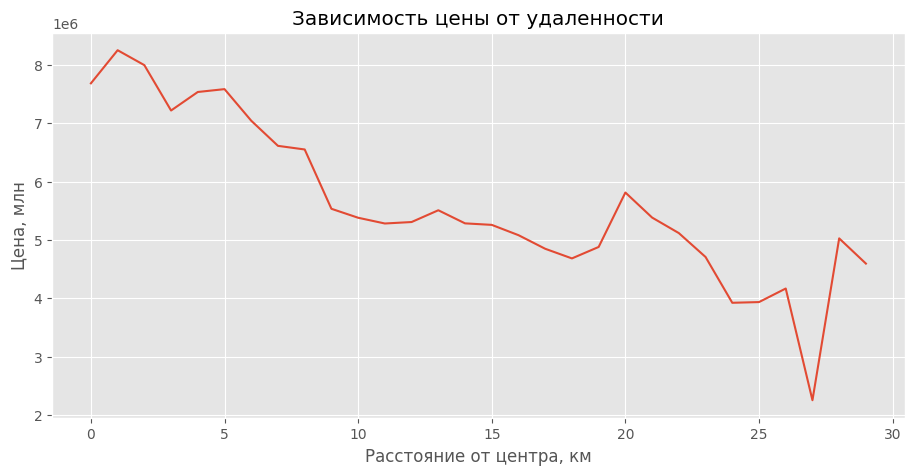

In [224]:
(
    data
    .loc[data['locality_name'] == 'санкт-петербург']
    .pivot_table(
        index='cityCenters_rounded_nearest',
        values='last_price',
        aggfunc='mean'
    )
    .plot(
        kind='line',      
        xlabel='Расстояние от центра, км',
        ylabel='Цена, млн',
        title='Зависимость цены от удаленности',
        legend=False,
        figsize=(11, 5)
    )
)

Виден общий тренд - снижение стоимости при удалении от центра

> Это согласуется с тем, что коэффициент корреляции отрицателен

### Напишите общий вывод

**Предобработка**
Изучаемые данные имели пропущенные значения - около 84% объектов имели хотя бы один пропуск. Также в данных присутствовали дубликаты.
 
Во время предобработки данных были установлены и исправлены дубликаты в столбце `locality_name`. Основной причиной их возникновения оказались:

* Использование "ё" вместо "е"
* Одновременное использование и "поселков", и "поселков городского типа"

Также были изучены пропуски в данных:

* При низкой представленности пропусков в столбцах, записи удалялись
* Данные о числе балконов, типе квартиры, числе парков и прудов поблизости заполнялись 0 или False. Так как если что-то не указано, то можно предположить, что этого нет
* Данные о расстояниях до центра и аэропорта заполнялись медианой по населенному пункту
* Все остальные пропуски оставили без изменений, но не удалялись, чтобы не терять ценную информацию

Для улучшения кода привели все столбцы к соответствующим им типам данных.

**Анализ**

Изучение статистики по площадям недвижимости для жилой площади мы получили некоторое подобие дискретности, связанное с числом комнат в квартире. Изучение распределения характеристик, связанных с размером кухонь, высотой потолков, числом этажей в доме показало наличие некоторых стандартов строительства, что также добавляет некоторую связь между данными.

Просмотр статистики по количеству дней между публикацией и снятием показал, что существуют два срока - 45 и 60 дней, на которых происходит автоматическое снятие публикации без подтверждения от продавца. Также этот анализ показал, что в среднем квартиры продаются в срок от 44 до 219 дней - в среднем 91 день.

Анализ факторов, влияющих на цену недвижимости выявил три основных фактора - общая площадь, площади жилой зоны и кухни. Чуть меньшая связь у цены со связанной с площадью характеристикой - числом комнат. Менее явно на цену влияет число этажей в доме - скорее всего, эта связь диктуется тем, что все невысокие дома являются старыми застройками (Скорее всего, именно возраст дома в большей степени определяет его цену, нежели число этажей). 

Дата публикации записей продажи дает следующие закономерности: 

* В период с 2014 до 2016 цена резко снижалась, а после 2018 начала расти. Между 2016 и 2018 был период стабильности
* В субботу зафиксирована самая низкая средняя цена квартир, а самая высокая - в среду
* Наибольшие цены на недвижимость весной и осенью, а зимой и летом происходит спад, что можно интерпретировать как влияние праздников и отпусков

Из географических факторов наибольшее влияние у расстояния до центра - чем ближе, тем выше цена. Чуть меньше влияют количества парков и прудов поблизости.

Если смотреть на общее распределение цен, то в самых часто встречающихся локациях наибольшая стоимость квадратного метра у жилья в Санкт-Петербурге, а меньшая - у в Выборге
